In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data=pd.read_csv("http://s3.amazonaws.com/assets.datacamp.com/course/Kaggle/train.csv")

In [4]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.3, random_state = 100) 

In [6]:
print(train.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [7]:
print("Missing values in training set:")
print(train.isna().sum())
print("\n")
print("Missing values in testing set:")
print(test.isna().sum())

Missing values in training set:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            128
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          473
Embarked         1
dtype: int64


Missing values in testing set:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             49
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          214
Embarked         1
dtype: int64


In [11]:
# Replacing missing values by mean imputation, ie, with mean column values
train.fillna(train.mean(), inplace=True)
test.fillna(test.mean(), inplace=True)

/home/abhirupa/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [12]:
print("Missing values in training set:")
print(train.isna().sum())
print("\n")
print("Missing values in testing set:")
print(test.isna().sum())

Missing values in training set:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          473
Embarked         1
dtype: int64


Missing values in testing set:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          214
Embarked         1
dtype: int64


In [13]:
# Dropping non-numeric data fields
train = train.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)
test = test.drop(['Name','Ticket', 'Cabin','Embarked'], axis=1)

In [14]:
# Use label encoding to convert 'Sex' feature into numeric format
labelEncoder = LabelEncoder()
labelEncoder.fit(train['Sex'])
labelEncoder.fit(test['Sex'])
train['Sex'] = labelEncoder.transform(train['Sex'])
test['Sex'] = labelEncoder.transform(test['Sex'])


/home/abhirupa/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


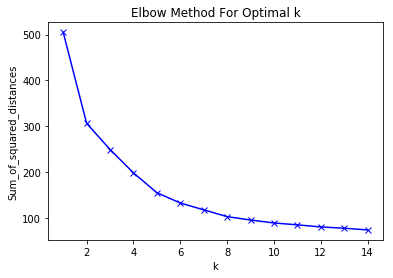

In [22]:
mms = MinMaxScaler()
mms.fit(train)
data_transformed = mms.transform(train)

Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

# k=5

In [59]:
from sklearn.metrics import accuracy_score
# Dropping the feature that is to be tested
X = np.array(train.drop(['Survived'], 1).astype(float))
y = np.array(train['Survived'])
xtest= np.array(test.drop(['Survived'], 1).astype(float))
ytest= np.array(test['Survived'])


In [58]:
kmeans = KMeans(n_clusters=2) # You want cluster the passenger records into 2: Survived or Not survived
kmeans.fit(X)
print(kmeans.cluster_centers_)  
print(kmeans.labels_)  
correct = 0
for i in range(len(X)):
    predict_me = np.array(X[i].astype(float))
    predict_me = predict_me.reshape(-1, len(predict_me))
    prediction = kmeans.predict(predict_me)
    if prediction[0] == y[i]:
        correct += 1

print("ACCURACY:",correct/len(X))

[[6.73725552e+02 2.28075710e+00 6.84542587e-01 3.12424338e+01
  4.73186120e-01 3.31230284e-01 3.16731726e+01]
 [2.24055556e+02 2.30065359e+00 6.07843137e-01 2.88393791e+01
  6.14379085e-01 4.11764706e-01 3.39641464e+01]]
[1 1 0 1 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 0
 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1
 0 0 1 0 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 1
 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1
 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 0 0 0
 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 1 1
 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0 1 1 0 0 1
 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0
 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1
 0 0 1 1 1 1 0 0 0 1 0 0 1 1 